# **Introducción a Polars**

Polars es una librería que permite el manejo y manipulación de Dataframes a nivel multihilo y alto procesamiento. Esta escrito para funcionar y trabajar en Rust, Python & NodeJS

Sus caracteristicas son:
- **Rápido**: Esta escrito desde 0, para adaptarse a la maquina y trabajar sin dependencias.
- **I/O**: Soporte de primera clase para todas las capas comunes de almacenamiento de datos: local, almacenamiento en la nube y base de datos.
- **Facíl de usar**: Permite escribír consultas que son faciles de entender. Internamente polars determinara la manera más eficiente para ejecutar usando un optimizador de consultas de manera interna.
- **Out of Core**: Permite procesar los datos sin requerir que todos los datos esten cargados en memoria al mismo tiempo.
- **Parallel**: Polars optmiza completamente el poder de la maquina dividiendo la carga de trabajo entre la cantidad de nucleos de CPU disponible sin ninguna configuración adicional.
- **Vectorized Query Engine**: Polars usa `Apache Arrow`, un formato de datos de columna, procesa las consultas de una manera vectorizada. Utiliza [SIMD](https://en.wikipedia.org/wiki/Single_instruction,_multiple_data) para optimizar el uso del CPU.

![alt](images/dato_tabular_rectangular.png)

Estructuras de Polars:

- **DataFrame** : Permite representar los datos de manera tabular. Esta compuesto por 2 o más series.
- **Lazy DataFrame** : Permite representar los datos de manera tabular. Esta compuesto por 2 o más series. Los datos de este tipo de DataFrame son obtenidos cuando son solicitados o son necesarios.
- **Series** : Es una estructura de datos de 1 dimensión con elementos del mismo tipop de dato.


Más información: [https://pola-rs.github.io/polars-book/](https://pola-rs.github.io/polars-book/)

> R también tiene manejo de DataFrames, mientras que SQL tiene tablas en sus BD

## Instalación

**PIP**
```bash
pip install polars
!pip install polars # Google Colab
```


**CONDA**
```bash
conda install polars
```

Link: [https://pola-rs.github.io/polars-book/user-guide/installation/](https://pola-rs.github.io/polars-book/user-guide/installation/)

Link: [https://anaconda.org/conda-forge/polars](https://anaconda.org/conda-forge/polars)

## Importando Polars

In [7]:
import polars as pl

## Creando el primer Dataframe


In [9]:
x = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
datos = {
    "X": x,
    "Y": [v**2 for v in x]
}

df = pl.DataFrame(datos)
df

X,Y
i64,i64
0,0
1,1
2,4
3,9
4,16
5,25
6,36
7,49
8,64


## Cargando datos a un Dataframe de Polars

Polars ofrece soporte para cargar y escribir archivos:

- CSV
- Parquet
- JSON
- AVRO

También nos permite cargar información desde:

- Bases de Datos
    - ConnectorX
    - ADBC (Arrow Database Connectivity)
    - SQLAlchemy
- AWS
    - S3
- Google Big Query

## Cargando datos desde un CSV en polars

Dependiendo del tipo de archivo, polars nos ofrece los metodos para la carga. Para leer encontraremos el metodo `read_` y para escribir `write_` seguido del tipo de archivo.

```python
df = pl.read_csv("<ruta del archivo>/archivo.csv")
```

In [10]:
df = pl.read_csv("DATASETS/beer_reviews.csv")

## Inspeccionando un Dataframe

- **head()** : Regresara por default las primeras 5 filas del DataFrame, también podemos indicar el número de filas que deseamos mostrar, pasando como argumento el número.
- **tail()** : Regresara por default las ultimas 5 filas del DataFrame, también podemos indicar el número de filas que deseamos mostrar, pasando como argumento el número.
- **shape**: Regresara el número de filas y columnas de nuestro DataFrame. (n, m), donde n son las filas y m el número de columnas.
- **dtypes**: Retorna el listado de columnas y el tipo que tienen
- **columns**: Retorna una lista con los nombres de columnas del DataFrame.
- **height**: Retorna el total de filas que hay en el DataFrame.
- **width**: Retorna el total de columnas/variables que hay en el DataFrame.
- **schema**: Retorna un diccionario con el nombre de columna/variable y el tipo de dato que utiliza.
- **sample**: Retorna una muestra aleatoria de datos, recibe como argumento el número de muestra que deseamos tomar de todo el DataFrame.
- **describe()**: Calcula algunas estadisticas de resumen para las columnas númericas, como la media, la mediana, desviación estandar, etc.

### Head & Tail

In [11]:
df.head()

brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
i64,str,i64,f64,f64,f64,str,str,f64,f64,str,f64,i64
10325,"""Vecchio Birrai…",1234817823,1.5,2.0,2.5,"""stcules""","""Hefeweizen""",1.5,1.5,"""Sausa Weizen""",5.0,47986
10325,"""Vecchio Birrai…",1235915097,3.0,2.5,3.0,"""stcules""","""English Strong…",3.0,3.0,"""Red Moon""",6.2,48213
10325,"""Vecchio Birrai…",1235916604,3.0,2.5,3.0,"""stcules""","""Foreign / Expo…",3.0,3.0,"""Black Horse Bl…",6.5,48215
10325,"""Vecchio Birrai…",1234725145,3.0,3.0,3.5,"""stcules""","""German Pilsene…",2.5,3.0,"""Sausa Pils""",5.0,47969
1075,"""Caldera Brewin…",1293735206,4.0,4.5,4.0,"""johnmichaelsen…","""American Doubl…",4.0,4.5,"""Cauldron DIPA""",7.7,64883


In [12]:
df.tail()

brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
i64,str,i64,f64,f64,f64,str,str,f64,f64,str,f64,i64
14359,"""The Defiant Br…",1162684892,5.0,4.0,3.5,"""maddogruss""","""Pumpkin Ale""",4.0,4.0,"""The Horseman's…",5.2,33061
14359,"""The Defiant Br…",1161048566,4.0,5.0,2.5,"""yelterdow""","""Pumpkin Ale""",2.0,4.0,"""The Horseman's…",5.2,33061
14359,"""The Defiant Br…",1160702513,4.5,3.5,3.0,"""TongoRad""","""Pumpkin Ale""",3.5,4.0,"""The Horseman's…",5.2,33061
14359,"""The Defiant Br…",1160023044,4.0,4.5,4.5,"""dherling""","""Pumpkin Ale""",4.5,4.5,"""The Horseman's…",5.2,33061
14359,"""The Defiant Br…",1160005319,5.0,4.5,4.5,"""cbl2""","""Pumpkin Ale""",4.5,4.5,"""The Horseman's…",5.2,33061


### shape

In [13]:
df.shape

(1586614, 13)

### dtypes

In [14]:
df.dtypes

[Int64,
 Utf8,
 Int64,
 Float64,
 Float64,
 Float64,
 Utf8,
 Utf8,
 Float64,
 Float64,
 Utf8,
 Float64,
 Int64]

### Columns

In [15]:
df.columns

['brewery_id',
 'brewery_name',
 'review_time',
 'review_overall',
 'review_aroma',
 'review_appearance',
 'review_profilename',
 'beer_style',
 'review_palate',
 'review_taste',
 'beer_name',
 'beer_abv',
 'beer_beerid']

### Height & Width

In [16]:
df.height

1586614

In [17]:
df.width

13

### schema

In [18]:
df.schema

{'brewery_id': Int64,
 'brewery_name': Utf8,
 'review_time': Int64,
 'review_overall': Float64,
 'review_aroma': Float64,
 'review_appearance': Float64,
 'review_profilename': Utf8,
 'beer_style': Utf8,
 'review_palate': Float64,
 'review_taste': Float64,
 'beer_name': Utf8,
 'beer_abv': Float64,
 'beer_beerid': Int64}

### sample

In [20]:
df.sample(2)

brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
i64,str,i64,f64,f64,f64,str,str,f64,f64,str,f64,i64
811,"""Highland Brewi…",1254989926,4.0,4.5,4.0,"""corby112""","""American Stout…",3.5,4.0,"""Highland Black…",5.6,6373
388,"""Brasserie Cant…",1171490559,4.0,4.0,4.0,"""akorsak""","""Lambic - Fruit…",4.5,4.5,"""Cantillon Sain…",6.0,8954


### Describe

In [21]:
df.describe()

describe,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
str,f64,str,f64,f64,f64,f64,str,str,f64,f64,str,f64,f64
"""count""",1.586614e6,"""1586614""",1.586614e6,1.586614e6,1.586614e6,1.586614e6,"""1586614""","""1586614""",1.586614e6,1.586614e6,"""1586614""",1.586614e6,1.586614e6
"""null_count""",0.0,"""0""",0.0,0.0,0.0,0.0,"""348""","""0""",0.0,0.0,"""0""",67785.0,0.0
"""mean""",3130.099202,null,1.2241e9,3.815581,3.735636,3.841642,null,null,3.743701,3.79286,null,7.042387,21712.794279
"""std""",5578.103987,null,7.6544e7,0.720622,0.697617,0.616093,null,null,0.682218,0.73197,null,2.322526,21818.335997
"""min""",1.0,"""""",8.40672001e8,0.0,1.0,0.0,"""0110x011""","""Altbier""",1.0,1.0,"""! (Old Ale)""",0.01,3.0
"""max""",28003.0,"""Łódzkie Browar…",1.3263e9,5.0,5.0,5.0,"""zzajjber""","""Witbier""",5.0,5.0,"""葉山ビール (Hayama …",57.7,77317.0
"""median""",429.0,null,1.2392e9,4.0,4.0,4.0,null,null,4.0,4.0,null,6.5,13906.0
"""25%""",143.0,null,1.1732e9,3.5,3.5,3.5,null,null,3.5,3.5,null,5.2,1717.0
"""75%""",2372.0,null,1.2886e9,4.5,4.0,4.0,null,null,4.0,4.5,null,8.5,39441.0


## Seleccionando Columnas del DF

Polars usa otros metodos para obtener los datos de la columna o columnas, si usamos `[]` como en Pandas es considerado un antipatron, sin embargo podemos hacer uso de los `[]`. 

No hay notación punto, así que no habra que preocuparse de columnas/variables con nombres con caracteres especiales.

### Seleccionando una columna

Para seleccionar una columna tenemos 2 maneras de hacerlo.
La primera forma es usar el método `select` y dentro colocar la columna/variable que deseamos obtener usando `pl.col`.


```python
selected_col = df.select(pl.col("col_name"))

selected_col = df.select("col_name")
```

La segunda forma de seleccionar la columna, es hacerlo como en Pandas, sin embargo, esto es considerado como un antipatron en Polars.

```python
# No es recomendado, pero podemos usar [col_name] como en pandas
selected_col = df["col_name"]
```

In [22]:
df.select("brewery_name").unique()

brewery_name
str
"""Brouwerij Slag…"
"""Big Time Brewe…"
"""Eskilstuna Ölk…"
"""Off The Rail B…"
"""Rocky Run Tap …"
"""Brauerei Josef…"
"""Brauerei Gotha…"
"""The Caledonian…"
"""Heinzelmännche…"


In [23]:
df.select(
    pl.col("brewery_name").unique()
)

brewery_name
str
"""Bavarian Barba…"
"""Lost Duck Brew…"
"""Barley and Hop…"
"""Hebei Lanbei L…"
"""Lucette Brewin…"
"""Brasserie Du C…"
"""Neustadt Sprin…"
"""Eight Degrees …"
"""Brok Brewery"""


In [25]:
%%timeit
breweries = df.select(
    pl.col("brewery_name").unique()
)

breweries

148 ms ± 363 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [27]:
%%timeit
df["brewery_name"].unique()

149 ms ± 296 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


### Seleccionando multiples columnas

Para seleccionar varias columnas, usaremos `pl.col` pero en lugar de pasar el nombre de columna/variable, pasaremos como argumento una lista con las columnas a seleccionar([]). 
De esta manera crearemos un subconjunto del DataFrame

```python
sub_df = df.select(['col_1', 'col_2'])

sub_df = df.select(pl.col(['col_1', 'col_2']))

sub_df = df.select(
    pl.col('col_1'), 
    pl.col('col_2')
)


subdf
```

Si quisieras seleccionar todas usamos `*` o `pl.all()`

```python
sub_df = df.select(pl.col('*'))
subdf
```

In [28]:
subdf = df.select(
    pl.col(["brewery_name", "beer_name"])
)

subdf.head(3)

brewery_name,beer_name
str,str
"""Vecchio Birrai…","""Sausa Weizen"""
"""Vecchio Birrai…","""Red Moon"""
"""Vecchio Birrai…","""Black Horse Bl…"


In [29]:
df.select(
    pl.col("*")
).sample(3)

brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
i64,str,i64,f64,f64,f64,str,str,f64,f64,str,f64,i64
3521,"""De Proefbrouwe…",1144643208,5.0,4.5,4.5,"""BeerPanther""","""Belgian Strong…",4.5,4.5,"""De Proef Flemi…",9.0,20679
13014,"""Surly Brewing …",1323597352,3.5,3.5,3.5,"""MrKennedy""","""American Brown…",4.5,3.5,"""Coffee Bender""",5.1,30764
3820,"""Bozeman Brewin…",1151206880,4.0,3.0,4.0,"""objectivemonke…","""American Pale …",4.0,3.5,"""Bozone Hefe We…",6.0,31306


### Seleccionando por tipo de dato

Polars maneja varios tipos de datos, alguno de ellos los podemos visualizar al usar `schema` sobre nuestro DataFrame y visualizar la relación columna/variable y tipo de dato que esta usa.
Esto nos permite seleccionar las columnas en base al tipo de Dato. Por ejemplo:

```python
df.select(
    pl.col(pl.Int64)
)
```


Link: [https://pola-rs.github.io/polars-book/user-guide/concepts/data-types/](https://pola-rs.github.io/polars-book/user-guide/concepts/data-types/)

In [32]:
df.select(
    pl.col(pl.Utf8)
)

brewery_name,review_profilename,beer_style,beer_name
str,str,str,str
"""Vecchio Birrai…","""stcules""","""Hefeweizen""","""Sausa Weizen"""
"""Vecchio Birrai…","""stcules""","""English Strong…","""Red Moon"""
"""Vecchio Birrai…","""stcules""","""Foreign / Expo…","""Black Horse Bl…"
"""Vecchio Birrai…","""stcules""","""German Pilsene…","""Sausa Pils"""
"""Caldera Brewin…","""johnmichaelsen…","""American Doubl…","""Cauldron DIPA"""
"""Caldera Brewin…","""oline73""","""Herbed / Spice…","""Caldera Ginger…"
"""Caldera Brewin…","""Reidrover""","""Herbed / Spice…","""Caldera Ginger…"
"""Caldera Brewin…","""alpinebryant""","""Herbed / Spice…","""Caldera Ginger…"
"""Caldera Brewin…","""LordAdmNelson""","""Herbed / Spice…","""Caldera Ginger…"


In [33]:
df.select(
    [pl.col("brewery_name"), pl.col(pl.Int64)]
)

brewery_name,brewery_id,review_time,beer_beerid
str,i64,i64,i64
"""Vecchio Birrai…",10325,1234817823,47986
"""Vecchio Birrai…",10325,1235915097,48213
"""Vecchio Birrai…",10325,1235916604,48215
"""Vecchio Birrai…",10325,1234725145,47969
"""Caldera Brewin…",1075,1293735206,64883
"""Caldera Brewin…",1075,1325524659,52159
"""Caldera Brewin…",1075,1318991115,52159
"""Caldera Brewin…",1075,1306276018,52159
"""Caldera Brewin…",1075,1290454503,52159


### Seleccionando por indice

In [34]:
df.iloc[:, :]

AttributeError: 'DataFrame' object has no attribute 'iloc'

![alt](https://www.descargarstickers.com/publico/static/src_img/2020/05/445560.png)

In [35]:
df.row(0)

(10325,
 'Vecchio Birraio',
 1234817823,
 1.5,
 2.0,
 2.5,
 'stcules',
 'Hefeweizen',
 1.5,
 1.5,
 'Sausa Weizen',
 5.0,
 47986)

In [36]:
df.row(0, named=True)

{'brewery_id': 10325,
 'brewery_name': 'Vecchio Birraio',
 'review_time': 1234817823,
 'review_overall': 1.5,
 'review_aroma': 2.0,
 'review_appearance': 2.5,
 'review_profilename': 'stcules',
 'beer_style': 'Hefeweizen',
 'review_palate': 1.5,
 'review_taste': 1.5,
 'beer_name': 'Sausa Weizen',
 'beer_abv': 5.0,
 'beer_beerid': 47986}

In [40]:
df.row(by_predicate=((pl.col("brewery_name") == "Vecchio Birraio") & (pl.col("beer_beerid") == 47986)), named=True)

{'brewery_id': 10325,
 'brewery_name': 'Vecchio Birraio',
 'review_time': 1234817823,
 'review_overall': 1.5,
 'review_aroma': 2.0,
 'review_appearance': 2.5,
 'review_profilename': 'stcules',
 'beer_style': 'Hefeweizen',
 'review_palate': 1.5,
 'review_taste': 1.5,
 'beer_name': 'Sausa Weizen',
 'beer_abv': 5.0,
 'beer_beerid': 47986}

In [41]:
df.head(3)

brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
i64,str,i64,f64,f64,f64,str,str,f64,f64,str,f64,i64
10325,"""Vecchio Birrai…",1234817823,1.5,2.0,2.5,"""stcules""","""Hefeweizen""",1.5,1.5,"""Sausa Weizen""",5.0,47986
10325,"""Vecchio Birrai…",1235915097,3.0,2.5,3.0,"""stcules""","""English Strong…",3.0,3.0,"""Red Moon""",6.2,48213
10325,"""Vecchio Birrai…",1235916604,3.0,2.5,3.0,"""stcules""","""Foreign / Expo…",3.0,3.0,"""Black Horse Bl…",6.5,48215


In [42]:
df[:3]

brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
i64,str,i64,f64,f64,f64,str,str,f64,f64,str,f64,i64
10325,"""Vecchio Birrai…",1234817823,1.5,2.0,2.5,"""stcules""","""Hefeweizen""",1.5,1.5,"""Sausa Weizen""",5.0,47986
10325,"""Vecchio Birrai…",1235915097,3.0,2.5,3.0,"""stcules""","""English Strong…",3.0,3.0,"""Red Moon""",6.2,48213
10325,"""Vecchio Birrai…",1235916604,3.0,2.5,3.0,"""stcules""","""Foreign / Expo…",3.0,3.0,"""Black Horse Bl…",6.5,48215


## Filtrando Datos

Para filtrar información usaremos el método `filter` el cual recibe como argumentos `pl.col("columna")` y posteriormente realizamos la operación de filtrado que deseamos aplicar a nuestros datos.

```python
df.filter(
    pl.col("c").is_between(datetime(2022, 12, 2), datetime(2022, 12, 8)),
)
```

Tambien podemos usar los operadores logicos y de comparación sobre las columnas, y de esta manera filtrar por más columnas

```python
df.filter(
    (pl.col("a") <= 3) & (pl.col("d").is_not_nan())
)
```


```python
df.filter(
    pl.col("beer_name") == "Guinness"
).select(pl.col('brewery_name').unique())
```

In [43]:
df.filter(
    pl.col("beer_name") == "Red Moon"
)

brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
i64,str,i64,f64,f64,f64,str,str,f64,f64,str,f64,i64
10325,"""Vecchio Birrai…",1235915097,3.0,2.5,3.0,"""stcules""","""English Strong…",3.0,3.0,"""Red Moon""",6.2,48213


In [44]:
df.filter(
    pl.col("beer_name") == "Red Moon"
).select(pl.col('brewery_name').unique())

brewery_name
str
"""Vecchio Birrai…"


In [45]:
df.filter(
    pl.col("beer_name") == "Red Moon"
).select(pl.col(pl.Int64))

brewery_id,review_time,beer_beerid
i64,i64,i64
10325,1235915097,48213


## Ordenando valores

Para ordenar los datos de un DataFrame de Polars, podemos usar el metodo **sort()** directamente en el DataFrame o aplicar un ordenamiento al usar `select` y usar `pl.col` el cual contiene el mismo método. Tambien recíbe como parametro el típo de ordenamiento, esto se hace agregando el parametro `descending`, el cuál recíbe como valor `True` o `False`. Por default viene configurado de manera ascendente.

```python
df.sort('columna_n')
df.sort('columna_n', descending=False)
```

Si deseamos ordenar por más de una columna/variable, debemos realizar el ordenamiento durante la selección y aplicar el método `sort`.

```python
df.filter(pl.col("col_1") != "").select(
    pl.col("col_1").sort(),
    pl.col("col_2"),
    pl.col("col_3").sort(descending=True)
).head(10)
```

In [46]:
df.sort("beer_beerid").head(10)

brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
i64,str,i64,f64,f64,f64,str,str,f64,f64,str,f64,i64
2,"""Yellow Rose Br…",1047929235,4.5,4.5,4.0,"""MAB""","""American IPA""",4.0,4.5,"""Cactus Queen I…",null,3
2,"""Yellow Rose Br…",1037795643,4.0,3.5,4.0,"""Morris729""","""American IPA""",4.0,4.0,"""Cactus Queen I…",null,3
2,"""Yellow Rose Br…",1019075828,4.0,4.0,3.5,"""Jason""","""American IPA""",4.5,4.0,"""Cactus Queen I…",null,3
2,"""Yellow Rose Br…",1111372706,3.0,4.5,4.5,"""shapudding""","""American Stout…",2.5,2.5,"""Wildcatter's C…",null,4
2,"""Yellow Rose Br…",1110335146,3.5,3.5,3.5,"""allengarvin""","""American Stout…",4.0,3.5,"""Wildcatter's C…",null,4
2,"""Yellow Rose Br…",1087912536,3.5,3.0,4.0,"""bditty187""","""American Stout…",3.5,3.0,"""Wildcatter's C…",null,4
2,"""Yellow Rose Br…",1067601637,4.0,4.5,4.0,"""feloniousmonk""","""American Stout…",3.5,4.0,"""Wildcatter's C…",null,4
2,"""Yellow Rose Br…",1066876922,4.5,4.0,4.0,"""NeroFiddled""","""American Stout…",4.0,4.0,"""Wildcatter's C…",null,4
2,"""Yellow Rose Br…",1054498901,3.0,4.0,4.0,"""assurbanipaul""","""American Stout…",2.5,3.5,"""Wildcatter's C…",null,4


In [47]:
df.filter(pl.col("brewery_name") != "").select(
    pl.col("brewery_name").sort(),
    pl.col("beer_beerid").sort(),
    pl.col("review_palate").sort(descending=True)
).head(10)

brewery_name,beer_beerid,review_palate
str,i64,f64
"""'t Hofbrouweri…",3,5.0
"""'t Hofbrouweri…",3,5.0
"""'t Hofbrouweri…",3,5.0
"""'t Hofbrouweri…",4,5.0
"""'t Hofbrouweri…",4,5.0
"""'t Hofbrouweri…",4,5.0
"""'t Hofbrouweri…",4,5.0
"""'t Hofbrouweri…",4,5.0
"""'t Hofbrouweri…",4,5.0


## Creando nuevas columnas

Para "crear" nuevas columnas, usaremos el método `with_columns`, dentro del método realizaremos la operación entre series que deseamos aplicar y guardar el resultado en la nueva columna. Usaremos el método `alias` para asignarle un nombre, tambien este método nos sirve para darle un alias a las columnas durante la consulta o agregación.

In [48]:
df2 = df.with_columns(
    (pl.col('beer_name') + pl.lit("(") + pl.col('brewery_name') + pl.lit(")")).alias("beer_name_full")
)
pl.Config.set_fmt_str_lengths(100)
df2.head(5)

brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid,beer_name_full
i64,str,i64,f64,f64,f64,str,str,f64,f64,str,f64,i64,str
10325,"""Vecchio Birraio""",1234817823,1.5,2.0,2.5,"""stcules""","""Hefeweizen""",1.5,1.5,"""Sausa Weizen""",5.0,47986,"""Sausa Weizen(Vecchio Birraio)"""
10325,"""Vecchio Birraio""",1235915097,3.0,2.5,3.0,"""stcules""","""English Strong Ale""",3.0,3.0,"""Red Moon""",6.2,48213,"""Red Moon(Vecchio Birraio)"""
10325,"""Vecchio Birraio""",1235916604,3.0,2.5,3.0,"""stcules""","""Foreign / Export Stout""",3.0,3.0,"""Black Horse Black Beer""",6.5,48215,"""Black Horse Black Beer(Vecchio Birraio)"""
10325,"""Vecchio Birraio""",1234725145,3.0,3.0,3.5,"""stcules""","""German Pilsener""",2.5,3.0,"""Sausa Pils""",5.0,47969,"""Sausa Pils(Vecchio Birraio)"""
1075,"""Caldera Brewing Company""",1293735206,4.0,4.5,4.0,"""johnmichaelsen""","""American Double / Imperial IPA""",4.0,4.5,"""Cauldron DIPA""",7.7,64883,"""Cauldron DIPA(Caldera Brewing Company)"""


## Aplicando funciones de agregación

En Pandas podiamos aplicar agregaciones sobre una columna o columnas usando el método `agg`, en polars pueden aplicarse durante la selección o durante un agrupamiento.

In [49]:
df.select(
    pl.col("review_appearance")
).sum()

review_appearance
f64
6095202.5


In [50]:
df.select(
    pl.col("review_appearance").sum()
)

review_appearance
f64
6095202.5


In [51]:
def iqr():
    """ Función para calcular el InterCuartil """
    return pl.col('review_appearance').quantile(0.75) - pl.col('review_appearance').quantile(0.25)

In [52]:
df.select(
    pl.col('review_appearance').quantile(0.25).suffix('_q25'),
    pl.col('review_appearance').quantile(0.75).suffix('_q75'),
    iqr().alias('review_appearance').suffix('_iqr')
)

review_appearance_q25,review_appearance_q75,review_appearance_iqr
f64,f64,f64
3.5,4.0,0.5


In [53]:
df.select(
    pl.col('brewery_name').count().alias("total_records"),
    pl.col('brewery_name').filter(pl.col('brewery_name') == "").count().alias("total_empty_records")
)

total_records,total_empty_records
u32,u32
1586614,15


## Agrupando



In [54]:
df.schema

{'brewery_id': Int64,
 'brewery_name': Utf8,
 'review_time': Int64,
 'review_overall': Float64,
 'review_aroma': Float64,
 'review_appearance': Float64,
 'review_profilename': Utf8,
 'beer_style': Utf8,
 'review_palate': Float64,
 'review_taste': Float64,
 'beer_name': Utf8,
 'beer_abv': Float64,
 'beer_beerid': Int64}

In [55]:
df.groupby("brewery_name").agg(
    pl.count("beer_name").sort(descending=True),
    pl.mean("review_overall").round(2)
)

brewery_name,beer_name,review_overall
str,u32,f64
"""South Hams Brewery Co Ltd""",4,4.13
"""Cairngorm Brewery Company, The""",85,3.79
"""De La Vega's Pecan Grill & Brewery""",3,3.5
"""1516 Brewing Company""",34,4.13
"""Angry Hank's Microbrewery""",3,3.83
"""A Tribbiera""",5,2.4
"""Brouwerij St. Bernardus NV""",6489,4.21
"""Heads Up Brewing""",6,3.0
"""Brewbaker""",11,3.86


## Tablas dínamicas ( Pivot Tables )

Las tablas dinamicas son otra forma de calcular estadisticas de resumen agrupadas. En Excel & PowerBI es común usar tablas dinamicas. En Polars solo podemos procesar una agregación por pivot. 

Para crear una tabla dinamica, usaremos el método **pivot**, el cúal recibe como parametros `values`, `index`, `columns` & `aggregate_function`. 

- `values` columna o columnas que contienen los valores a los cuales les aplicaremos la agregación.
- `index` es la columna por la que deseamos agrupar.
- `columns` son las columnas que seran usadas como nombre de las columnas
- `aggregate_function` es la operación de agregación, puede ser
    - first
    - sum
    - max
    - min
    - mean
    - median
    - last
    - count

```python

df.pivot(index='col_agrupar', columns='col_header', values='col_datos', aggregate_function='mean')
```

In [56]:
df.pivot(index='brewery_name', columns='beer_name', values='beer_name', aggregate_function='count')

brewery_name,Sausa Weizen,Red Moon,Black Horse Black Beer,Sausa Pils,Cauldron DIPA,Caldera Ginger Beer,Amstel Light,Caldera Oatmeal Stout,Caldera OBF 15,Rauch Ür Bock,Caldera Pale Ale,Pilot Rock Porter,Vas Deferens Ale,Caldera IPA,Cauldron Espresso Stout,Old Growth Imperial Stout,Dry Hop Red,Southside Strong,Caldera Märzen,Lawnmower Lager,Caldera Rose Petal (Kettle Series),Amstel Bright,Nut Brown,The Captain's Porter,The Highland Stagger,Swamp Fox IPA,Hoppin' To Heaven IPA,Hopportunity Knocks,Ashland Amber,Coconut Porter,Dry Hop Orange,Kirner Pils Premium,Alpha Beta,Caldera Pilsener Bier,Hibiscus Ginger Beer,Exotic Erotic Passion Fruit Ale,…,Cherry Pickers Stout,Outback Chilli Beer,3.0,Outback Stout,Outback Pilsener,Outback Country Bitter,Outback Ale,Meinel Weizenbock,Mephisto,Flemish Cherry,Three Fingers IPA,Parum Pango,Rasberry Porter,Dark Stout,Brooklyn Honey Porter,Cabin Fever Stout,Little Thumper Ale,Single Finger IPA,Abominal Snow Beer,Death,Da Oaty,Lump Of Coal Stout,Four Horsemen #2: War,Brandy Brown,English Nut Brown,Four Horsemen #1: Stephano's Stout,Very Hoppy Pale Ale,Prohibition Lager,Four Horsemen #4 War,2007 Resolution #1,O'Defiant Stout,Big Thumper Ale,Bear Mountain Ale,Highland Porter,Baron Von Weizen,Resolution #2,The Horseman's Ale
str,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,…,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32
"""Vecchio Birraio""",1,1,1,1,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,…,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
"""Caldera Brewing Company""",null,null,null,null,1,9,null,2,1,42,163,9,36,381,1,29,10,1,1,14,7,null,null,null,null,null,null,58,98,1,6,null,1,2,1,1,…,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
"""Amstel Brouwerij B. V.""",null,null,null,null,null,null,465,null,null,null,null,null,null,null,null,null,null,null,null,null,null,14,null,null,null,null,null,null,null,null,null,null,null,null,null,null,…,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
"""Broad Ripple Brew Pub""",null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,1,null,null,null,null,null,null,null,null,null,null,null,null,null,…,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
"""Moon River Brewing Company""",null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,32,2,41,null,null,null,null,null,null,null,null,null,null,…,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
"""Hoppin' Frog Brewery""",null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,214,null,null,null,null,null,null,null,null,null,…,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
"""Kirner Bier""",null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null

## Visualizando

Polars es "compatible" con `matplotlib` y `seaborn`, sin embargo debemos en algunas ocasiones pasar el DataFrame a pandas para poder realizar la visualización. 

In [58]:
import matplotlib.pyplot as plt

In [57]:
df.to_pandas()

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
0,10325,Vecchio Birraio,1234817823,1.5,2.0,2.5,stcules,Hefeweizen,1.5,1.5,Sausa Weizen,5.0,47986
1,10325,Vecchio Birraio,1235915097,3.0,2.5,3.0,stcules,English Strong Ale,3.0,3.0,Red Moon,6.2,48213
2,10325,Vecchio Birraio,1235916604,3.0,2.5,3.0,stcules,Foreign / Export Stout,3.0,3.0,Black Horse Black Beer,6.5,48215
3,10325,Vecchio Birraio,1234725145,3.0,3.0,3.5,stcules,German Pilsener,2.5,3.0,Sausa Pils,5.0,47969
4,1075,Caldera Brewing Company,1293735206,4.0,4.5,4.0,johnmichaelsen,American Double / Imperial IPA,4.0,4.5,Cauldron DIPA,7.7,64883
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1586609,14359,The Defiant Brewing Company,1162684892,5.0,4.0,3.5,maddogruss,Pumpkin Ale,4.0,4.0,The Horseman's Ale,5.2,33061
1586610,14359,The Defiant Brewing Company,1161048566,4.0,5.0,2.5,yelterdow,Pumpkin Ale,2.0,4.0,The Horseman's Ale,5.2,33061
1586611,14359,The Defiant Brewing Company,1160702513,4.5,3.5,3.0,TongoRad,Pumpkin Ale,3.5,4.0,The Horseman's Ale,5.2,33061
1586612,14359,The Defiant Brewing Company,1160023044,4.0,4.5,4.5,dherling,Pumpkin Ale,4.5,4.5,The Horseman's Ale,5.2,33061


In [66]:
breweries = df.groupby("brewery_name").agg(
    pl.count("beer_name").alias("total_beers")
).sort("total_beers", descending=True)

breweries

brewery_name,total_beers
str,u32
"""Boston Beer Company (Samuel Adams)""",39444
"""Dogfish Head Brewery""",33839
"""Stone Brewing Co.""",33066
"""Sierra Nevada Brewing Co.""",28751
"""Bell's Brewery, Inc.""",25191
"""Rogue Ales""",24083
"""Founders Brewing Company""",20004
"""Victory Brewing Company""",19479
"""Lagunitas Brewing Company""",16837


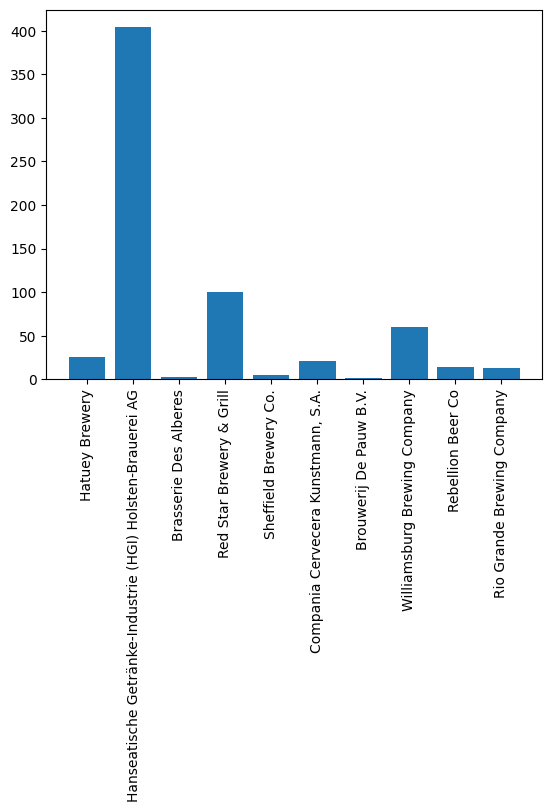

In [70]:
fig, ax = plt.subplots()

sample = breweries.sample(10)

ax.bar(
    x=sample["brewery_name"],
    height=sample["total_beers"],
)

plt.xticks(rotation=90)
plt.show()

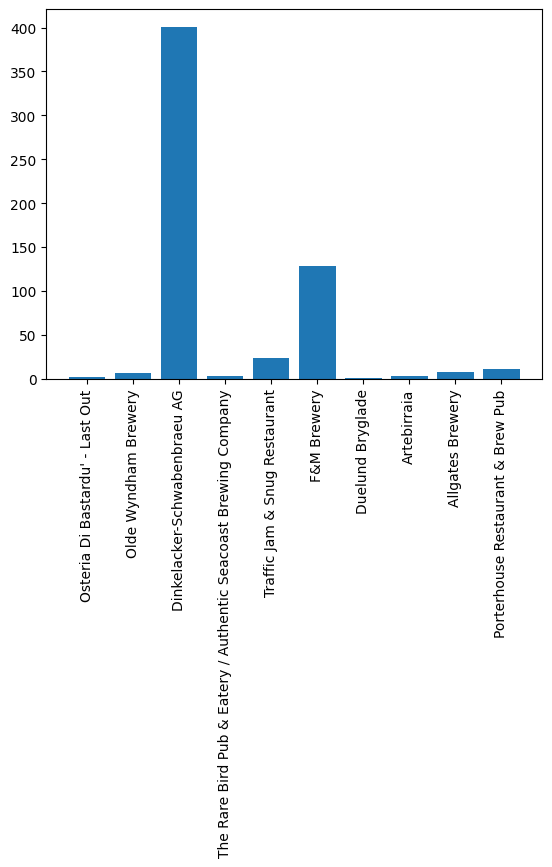

In [72]:
sample = breweries.sample(10)

plt.bar(
    sample.select('brewery_name').to_series(),
    sample.select('total_beers').to_series()
)
plt.xticks(rotation=90)

plt.show()

In [62]:
import pandas as pd
import pyarrow as pa
import plotly.express as px

In [73]:
sample = breweries.sample(15)

px.bar(x = sample.select('brewery_name').to_series(),
       y = sample.select('total_beers').to_series())

In [74]:
sample = breweries.sample(12)

px.bar(x = sample.select('brewery_name').to_series(),
       y = sample.select('total_beers').to_series())

In [76]:
# Pasando Polars a Pandas
sample = breweries.sample(50).to_pandas()
sample

,brewery_name,total_beers
0,Fulton Beer,72
1,Brauerei Rosengarten AG,6
2,Brewery Creek Inn Restaurant & Brewery,8
3,Brasserie Des Alberes,3
4,North Peak Brewing Company,409
5,United Breweries - UB Group,651
6,Legend Brewing Co.,886
7,Derwent Brewing Co.,1
8,J.J. Bitting Brewing Company,179
9,General Lafayette Inn & Brewery,451


In [79]:
sample = sample.sample(15)

px.bar(data_frame=sample, x='brewery_name', y='total_beers')

## Guardando el DataFrame en un archivo

Polars en su modulo de **IO** nos permite obtener nuestros datos de diferentes fuentes, así como tiene los métodos `read_` , tambíen contiene su contraparte `write_`

In [65]:
df.write_parquet("beer_reviews.parquet")